# Exploring Data Clustering

Approaches to explore:
- [Priciple Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis): [scikit-learn](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html)
- [Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering): [scikit-learn](http://scikit-learn.org/stable/modules/clustering.html) [DBSCAN](http://scikit-learn.org/stable/modules/clustering.html#dbscan)



### Notes on [DBSCAN](http://scikit-learn.org/stable/modules/clustering.html#dbscan):
There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher `min_samples` or lower `eps` indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist `min_samples` other samples within a distance of `eps`, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples, that can be built by recursively by taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Further, any cluster has at least min_samples points in it, following the definition of a core sample. For any sample that is not a core sample, and does have a distance higher than eps to any core sample, it is considered an outlier by the algorithm.

### Import and manipulate SAS data


In [1]:
import glob
import os.path as op
import numpy as np

In [2]:
sas_dir = 'sascalc'
saxs_dir = 'xray'
sans_dir = 'neutron_D2Op_100'
sas_ext = '*.iq'
saxs_search = op.join(sas_dir, saxs_dir, sas_ext)
sans_search = op.join(sas_dir, sans_dir, sas_ext)
print(saxs_search)
print(sans_search)

sascalc/xray/*.iq
sascalc/neutron_D2Op_100/*.iq


In [3]:
saxs_files = glob.glob(saxs_search)
sans_files = glob.glob(sans_search)
print(len(saxs_files))
print(len(sans_files))

200
200


In [4]:
saxs_data = []
first_data = np.loadtxt(saxs_files[0])
saxs_data.append(first_data[1:, 1])
for saxs_file in saxs_files[1:]:
    x_data = np.loadtxt(saxs_file)
    assert np.allclose(x_data[0, 1], first_data[0, 1]), 'ERROR: data not normalize'
    assert np.allclose(x_data[:, 0], first_data[:, 0]), 'ERROR: data not on same Q-grid'
    saxs_data.append(x_data[1:, 1])
saxs_data = np.array(saxs_data)

In [5]:
sans_data = []
first_data = np.loadtxt(sans_files[0])
sans_data.append(first_data[1:, 1])
for sans_file in sans_files[1:]:
    n_data = np.loadtxt(sans_file)
    assert np.allclose(n_data[0, 1], first_data[0, 1]), 'ERROR: data not normalize'
    assert np.allclose(n_data[:, 0], first_data[:, 0]), 'ERROR: data not on same Q-grid'
    sans_data.append(n_data[1:, 1])
sans_data = np.array(sans_data)

In [6]:
q_saxs = x_data[1:, 0]
q_sans = n_data[1:, 0]
print(q_saxs)    
print(q_sans)

[ 0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12
  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24
  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35  0.36
  0.37  0.38  0.39  0.4 ]
[ 0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12
  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24
  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35  0.36
  0.37  0.38  0.39  0.4 ]


In [7]:
n_samples, n_features = saxs_data.shape # for PCA, should be (n_samples, n_features)
print('samples: {}\nfeatures: {}'.format(n_samples, n_features))

samples: 200
features: 40


In [8]:
print(saxs_data[:5, :5])
print(sans_data[:5, :5])

[[ 0.109218  0.084704  0.056446  0.034189  0.021314]
 [ 0.109229  0.084742  0.056516  0.034278  0.021403]
 [ 0.109209  0.08468   0.056426  0.034189  0.021332]
 [ 0.109217  0.084712  0.05648   0.034219  0.021273]
 [ 0.109084  0.084166  0.055315  0.032548  0.019586]]
[[ 0.109411  0.085308  0.057354  0.035127  0.022116]
 [ 0.109422  0.085347  0.057425  0.03522   0.022212]
 [ 0.109402  0.085285  0.057335  0.035129  0.022139]
 [ 0.109405  0.085304  0.057374  0.035155  0.022091]
 [ 0.109262  0.084723  0.056155  0.033417  0.020328]]


In [9]:
min_vals = saxs_data.min(axis=0)
max_vals = saxs_data.max(axis=0)
saxs_range = max_vals - min_vals
print(saxs_range)

[  3.06600000e-03   9.43600000e-03   1.33460000e-02   1.14230000e-02
   7.35500000e-03   4.51100000e-03   3.98700000e-03   2.87300000e-03
   1.59900000e-03   1.02400000e-03   9.73000000e-04   9.71000000e-04
   8.56000000e-04   7.61000000e-04   6.38000000e-04   5.57000000e-04
   5.14000000e-04   5.20000000e-04   4.33000000e-04   2.53000000e-04
   1.81000000e-04   1.41000000e-04   1.21000000e-04   1.11000000e-04
   8.90000000e-05   8.00000000e-05   7.80000000e-05   6.20000000e-05
   5.50000000e-05   5.20000000e-05   5.20000000e-05   5.40000000e-05
   5.60000000e-05   5.60000000e-05   4.80000000e-05   4.30000000e-05
   3.70000000e-05   3.50000000e-05   3.40000000e-05   3.10000000e-05]


In [10]:
min_vals = sans_data.min(axis=0)
max_vals = sans_data.max(axis=0)
sans_range = max_vals - min_vals
print(sans_range)

[  2.99300000e-03   9.24900000e-03   1.31780000e-02   1.14230000e-02
   7.64500000e-03   4.73800000e-03   4.14400000e-03   2.99600000e-03
   1.68600000e-03   1.05300000e-03   1.05500000e-03   1.01000000e-03
   9.64000000e-04   9.33000000e-04   8.02000000e-04   6.98000000e-04
   6.12000000e-04   6.15000000e-04   5.42000000e-04   3.51000000e-04
   2.48000000e-04   1.97000000e-04   1.68000000e-04   1.32000000e-04
   1.04000000e-04   1.01000000e-04   9.30000000e-05   8.10000000e-05
   6.80000000e-05   5.60000000e-05   4.50000000e-05   3.60000000e-05
   3.00000000e-05   3.00000000e-05   2.90000000e-05   3.50000000e-05
   3.10000000e-05   2.90000000e-05   2.70000000e-05   2.30000000e-05]


#### Rescale the data
Originally used `StandardScaler` but changed to `RobustScaler` to avoid complications from outliers (which skew the mean)

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler
x_scaler = RobustScaler()
n_scaler = RobustScaler()

In [12]:
x_scaler.fit(saxs_data)
n_scaler.fit(sans_data)

RobustScaler(copy=True, with_centering=True, with_scaling=True)

In [14]:
scaled_saxs = x_scaler.transform(saxs_data)
scaled_sans = n_scaler.transform(sans_data)
print(scaled_saxs[:5, :5])
print(scaled_sans[:5, :5])

[[-0.49091402 -0.40799064 -0.32635368 -0.05543155  0.90684171]
 [-0.4789802  -0.39431297 -0.30578209 -0.02232143  0.95177985]
 [-0.50067806 -0.41662917 -0.33223128 -0.05543155  0.91593032]
 [-0.49199892 -0.40511113 -0.31636177 -0.04427083  0.88613986]
 [-0.63628967 -0.60163772 -0.65873191 -0.66592262  0.03433476]]
[[-0.48020362 -0.40078512 -0.2940716  -0.03060129  0.90528101]
 [-0.46776018 -0.38620432 -0.27385951  0.00268432  0.95179264]
 [-0.49038462 -0.40938405 -0.29948046 -0.02988547  0.91642442]
 [-0.48699095 -0.40228059 -0.28837805 -0.02057981  0.8931686 ]
 [-0.64875566 -0.61949715 -0.63539962 -0.64262706  0.03900194]]


In [15]:
min_vals = scaled_saxs.min(axis=0)
max_vals = scaled_saxs.max(axis=0)
x_scaled_range = max_vals - min_vals

min_vals = scaled_sans.min(axis=0)
max_vals = scaled_sans.max(axis=0)
n_scaled_range = max_vals - min_vals

print(x_scaled_range)
print(n_scaled_range)

[ 3.32628153  3.39638261  3.92212181  4.24962798  3.71370866  2.55943262
  2.84531668  3.72512156  3.16947473  5.27155727  6.76869565  5.46272855
  4.29611041  4.51632047  2.93333333  3.23367199  3.85018727  4.3153527
  3.90970655  3.5017301   3.23214286  2.87755102  3.27027027  4.0733945
  3.42307692  4.          4.10526316  3.875       4.23076923  4.
  4.33333333  4.15384615  4.57142857  4.66666667  3.42857143  3.58333333
  3.36363636  3.18181818  3.77777778  3.875     ]
[ 3.38574661  3.45789326  3.75147676  4.08840372  3.70397287  2.6151511
  2.778411    3.70562771  3.14405594  4.47133758  7.08053691  4.73622509
  3.96707819  5.22689076  3.37684211  3.18721461  3.80715397  4.3772242
  4.12952381  3.31914894  3.25245902  2.90774908  3.02702703  3.66666667
  3.46666667  4.04        4.48192771  3.81176471  4.45901639  5.6
  4.09090909  3.27272727  3.          3.24324324  3.51515152  4.375
  4.42857143  4.83333333  3.85714286  3.28571429]


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

/opt/intel/intelpython35/envs/sassie/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


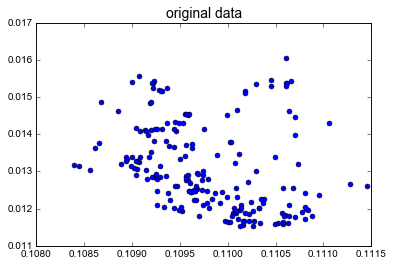

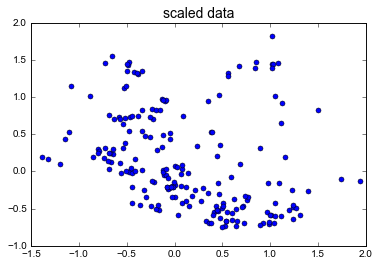

In [17]:
plt.figure()
plt.plot(saxs_data[:,0], saxs_data[:,5], 'bo', markersize=5)
plt.title('original data')
plt.figure()
plt.plot(scaled_saxs[:,0], scaled_saxs[:,5], 'bo', markersize=5)
plt.title('scaled data')

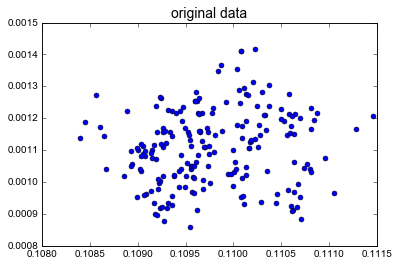

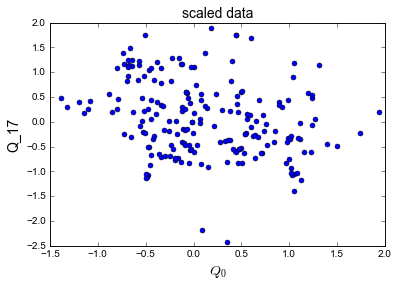

In [18]:
plt.figure()
plt.plot(saxs_data[:,0], saxs_data[:,15], 'bo', markersize=5)
plt.title('original data')
plt.figure()
plt.plot(scaled_saxs[:,0], scaled_saxs[:,17], 'bo', markersize=5)
plt.xlabel(r'$Q_{}$'.format(0))
plt.ylabel(r'Q_{}'.format(17))
plt.title('scaled data')

/opt/intel/intelpython35/envs/sassie/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


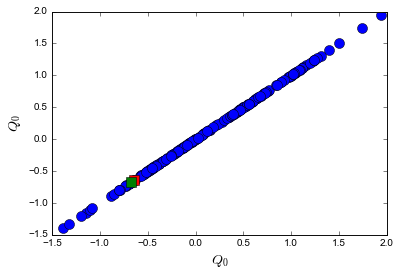

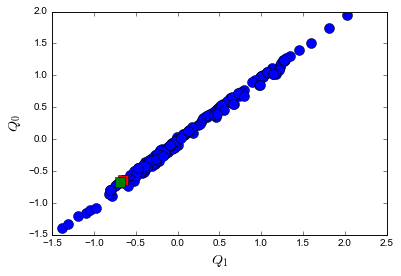

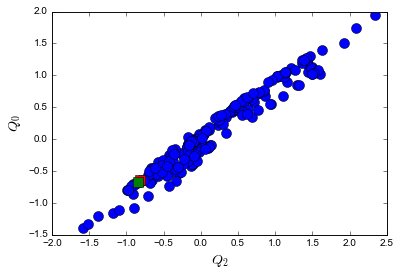

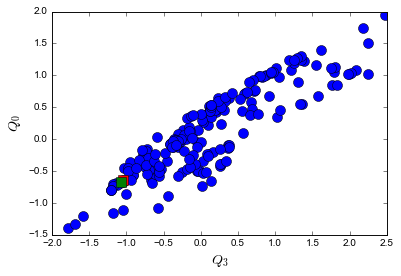

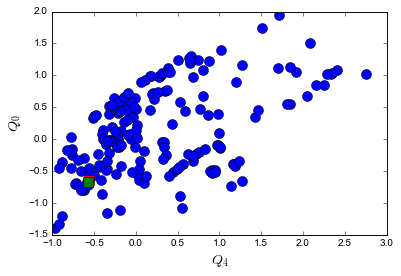

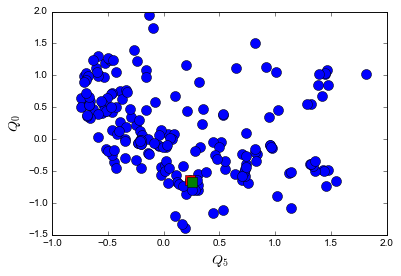

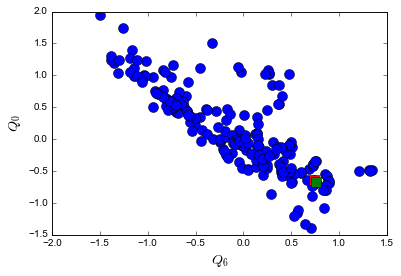

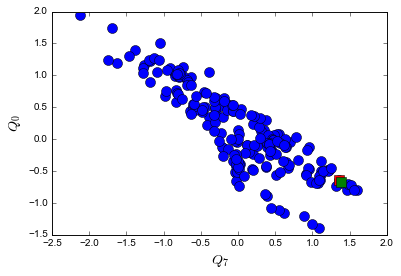

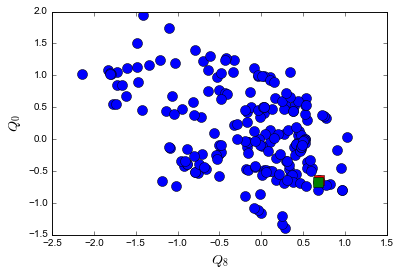

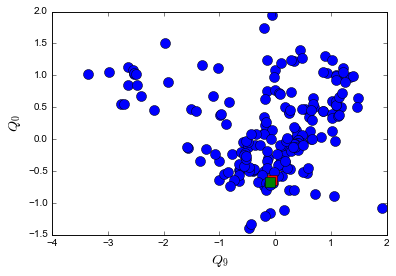

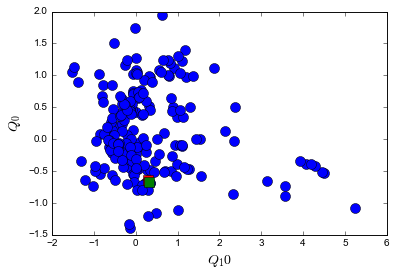

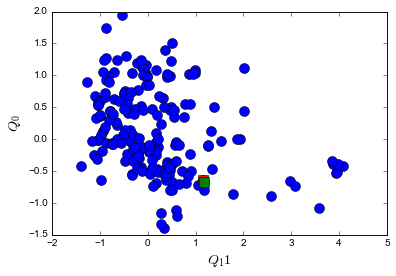

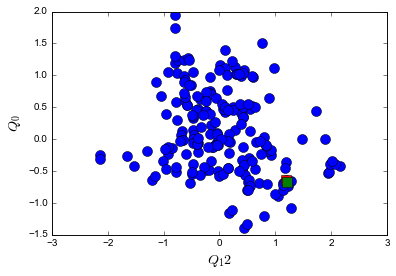

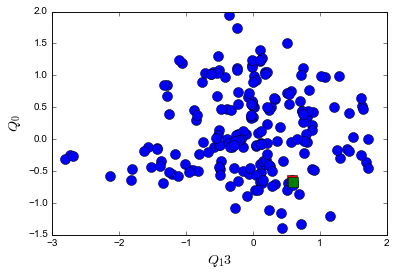

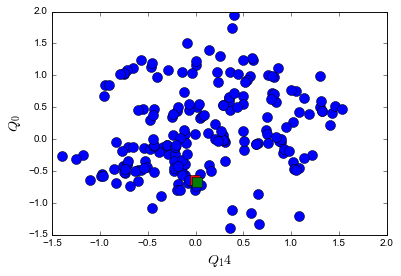

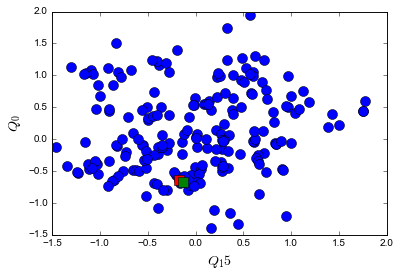

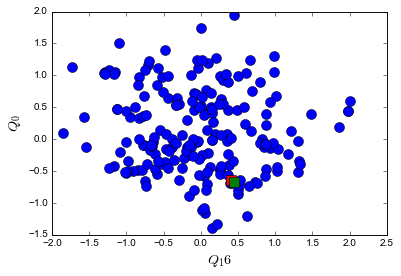

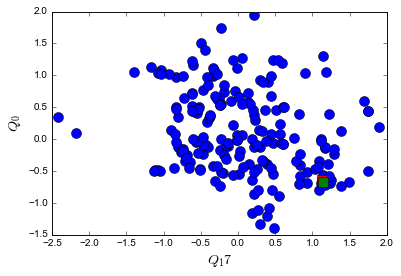

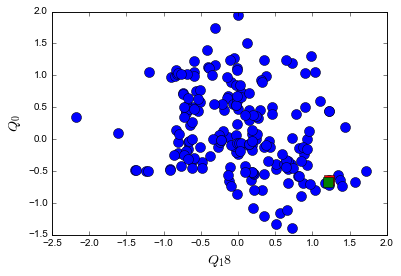

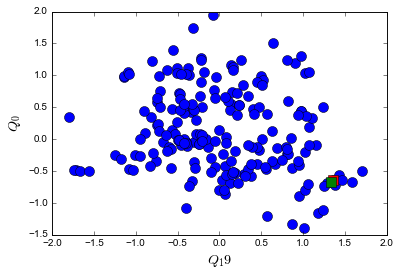

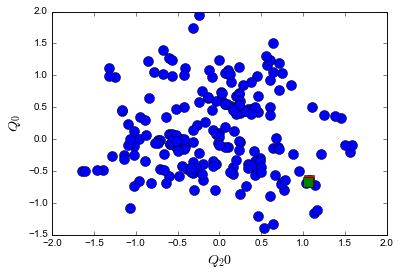

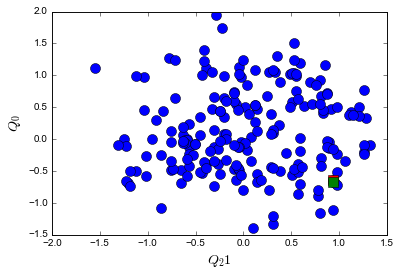

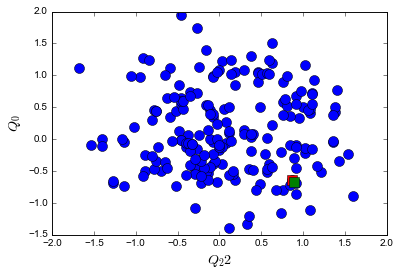

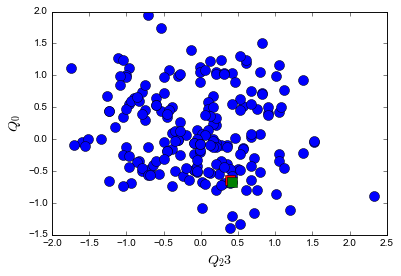

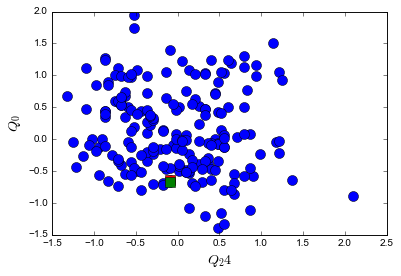

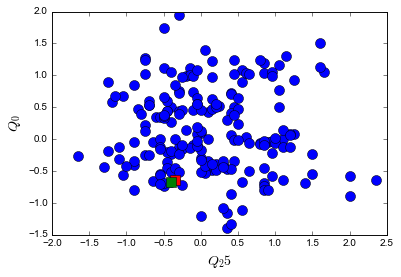

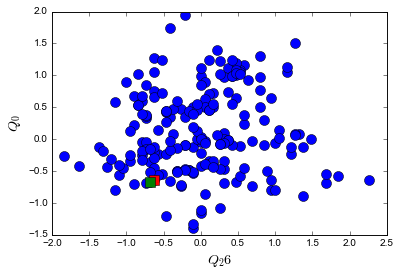

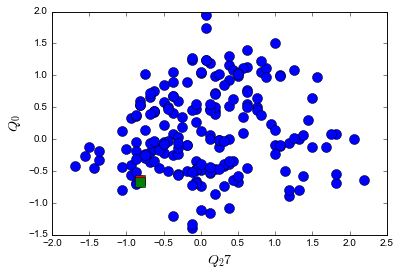

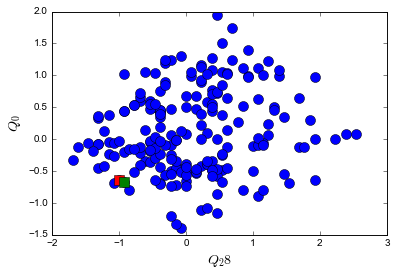

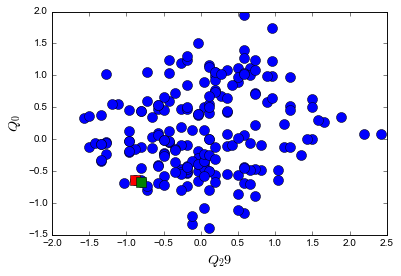

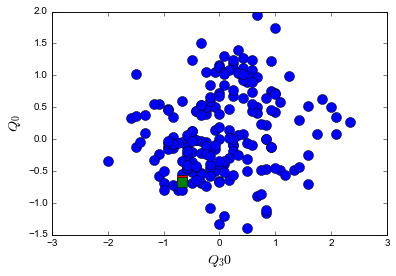

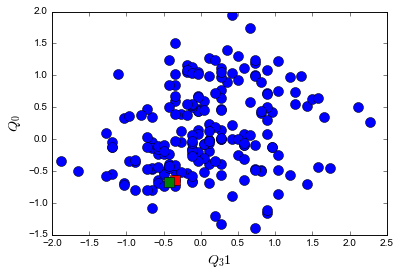

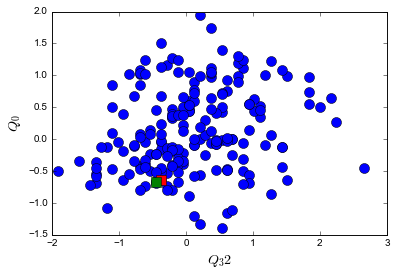

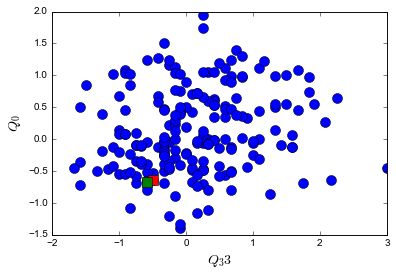

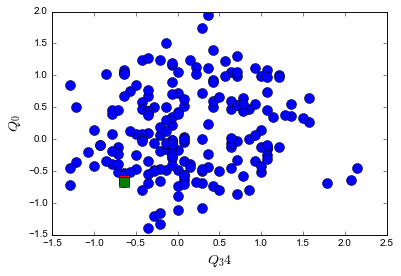

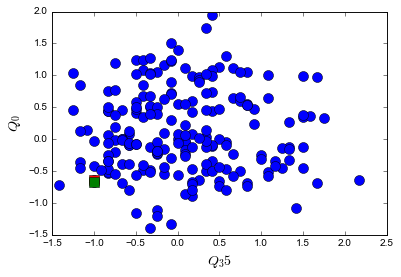

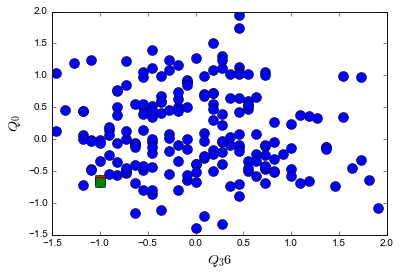

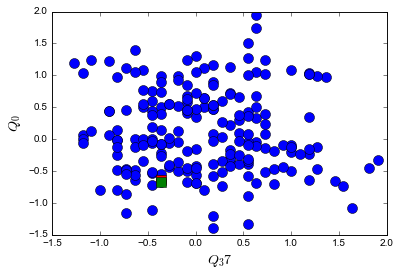

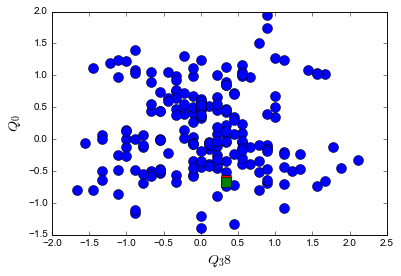

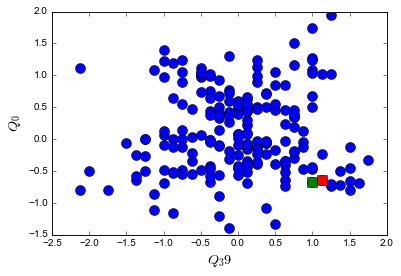

In [19]:
i0 = 2
i_compare = 0
for i0 in range(40):
    plt.figure()
    plt.plot(scaled_saxs[:,i0], scaled_saxs[:, i_compare], 'bo')
    plt.plot(scaled_saxs[112,i0], scaled_saxs[112, i_compare], 'rs')
    plt.plot(scaled_saxs[113,i0], scaled_saxs[113, i_compare], 'gs')
    plt.xlabel(r'$Q_{}$'.format(i0))
    plt.ylabel(r'$Q_{}$'.format(i_compare))

### DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [21]:
# Compute DBSCAN
## Tune these parameters to adjust cluster size ##
distance = 1
min_samples = 2
##################################################
x_db = DBSCAN(eps=distance, min_samples=min_samples).fit(scaled_saxs)
x_core_samples_mask = np.zeros_like(x_db.labels_, dtype=bool)
x_core_samples_mask[x_db.core_sample_indices_] = True
x_labels = x_db.labels_ + 1 # 0's are independent groups
x_clusters_ = len(set(x_labels)) - (1 if -1 in x_labels else 0)

n_db = DBSCAN(eps=distance, min_samples=min_samples).fit(scaled_saxs)
n_core_samples_mask = np.zeros_like(n_db.labels_, dtype=bool)
n_core_samples_mask[n_db.core_sample_indices_] = True
n_labels = n_db.labels_ + 1 # 0's are independent groups
n_clusters_ = len(set(n_labels)) - (1 if -1 in n_labels else 0)

In [37]:
# x-ray clusters
x_unique = set(x_labels)
x_unique.remove(0)
print('cluster labels: {}'.format(x_unique))
print('unique clusters: {}'.format(len(x_unique) + list(x_labels).count(0)))
for c in set(x_labels):
    print('{}: {}'.format(c, list(x_labels).count(c)))

cluster labels: set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
unique clusters: 164
0: 138
1: 2
2: 2
3: 2
4: 3
5: 2
6: 2
7: 2
8: 2
9: 2
10: 2
11: 3
12: 2
13: 2
14: 2
15: 2
16: 3
17: 4
18: 2
19: 2
20: 4
21: 3
22: 2
23: 2
24: 2
25: 2
26: 4


In [61]:
# neutron clusters
unique = set(n_labels)
unique.remove(0)
total_clusters = len(unique) + list(n_labels).count(0)
print('cluster labels: {}'.format(unique))
print('unique clusters: {}'.format(total_clusters))
for c in set(n_labels):
    print('{}: {}'.format(c, list(n_labels).count(c)))

cluster labels: set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
unique clusters: 164
0: 138
1: 2
2: 2
3: 2
4: 3
5: 2
6: 2
7: 2
8: 2
9: 2
10: 2
11: 3
12: 2
13: 2
14: 2
15: 2
16: 3
17: 4
18: 2
19: 2
20: 4
21: 3
22: 2
23: 2
24: 2
25: 2
26: 4


In [40]:
np.savetxt('x_clusters.txt', x_labels, fmt='%d')
np.savetxt('n_clusters.txt', n_labels, fmt='%d')

In [41]:
print(n_labels)
print(n_labels.shape)
slabels = np.array(n_labels, dtype='str')
# print(slabels)
# print(slabels.shape)

[ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  2  3  3  0  4  4
  0  0  0  0  0  0  0  0  5  6  7  0  7  6  0  0  0  0  0  0  0  8  8  0  0
  0  0  0  0  0  9  9  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  5
 10 10  0  0  0  0  0  0  0 11 11 11  0  0  0 12  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 13 13  0  0 14 14  0  0  0  0  0  0  0 15 15  0  0
  0  0  0  0  0 16  0  0 16 16 17 17 17 17  0 18  0 18  0  0  0  0  0  0  0
 19 19  0  0  0  0 20 20 20 21 21 21 20  0  0  0  0  0 22 22  0 23  0 23  0
  0  0 24 24  0  0 12  0  0  0 25 25  0  0  0  0 26 26  0 26 26  0  0  0  0]
(200,)


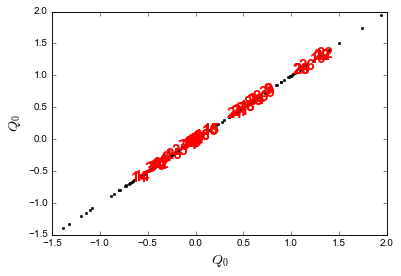

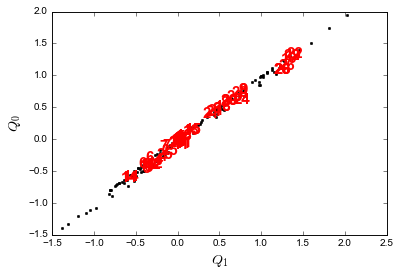

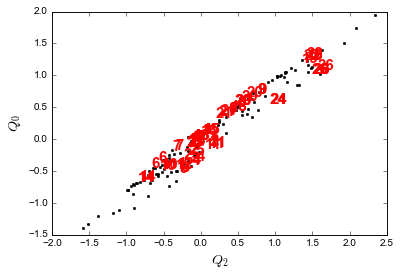

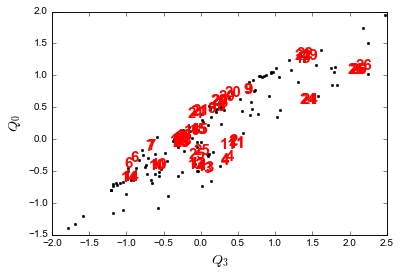

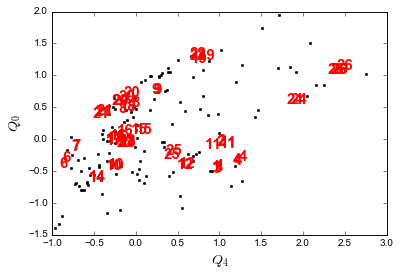

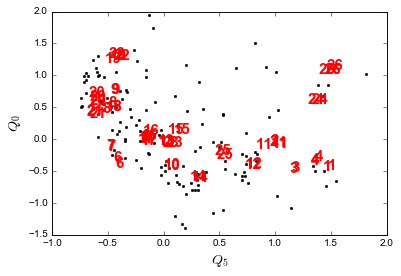

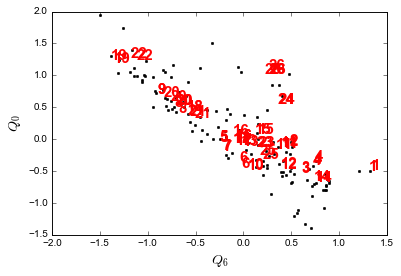

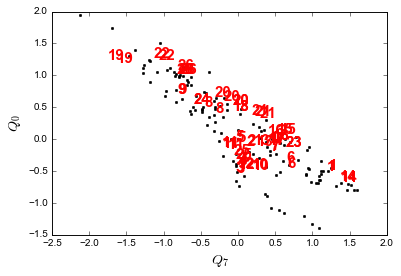

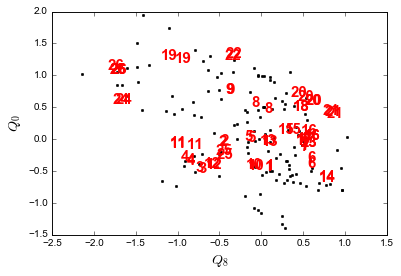

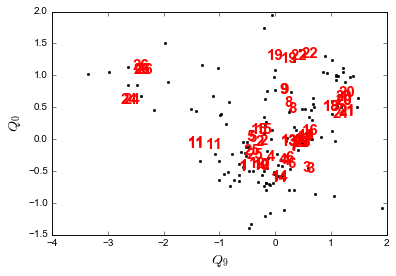

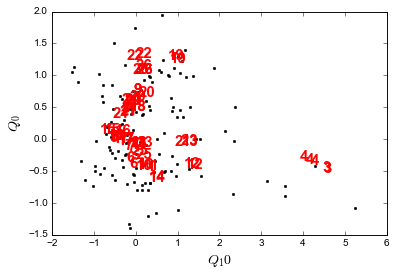

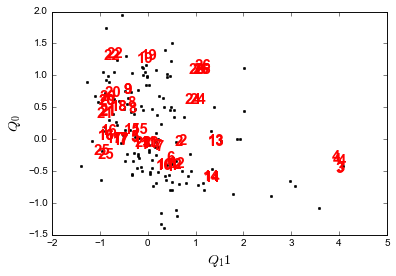

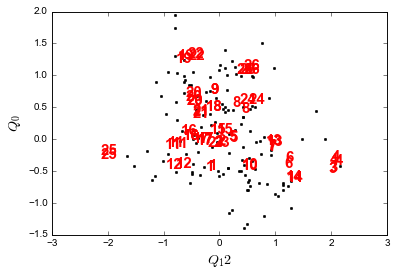

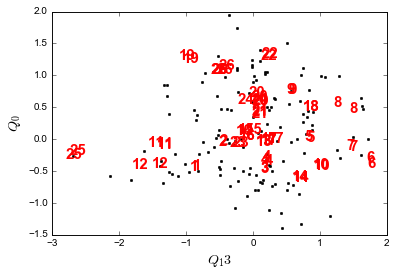

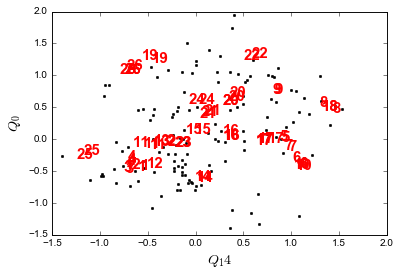

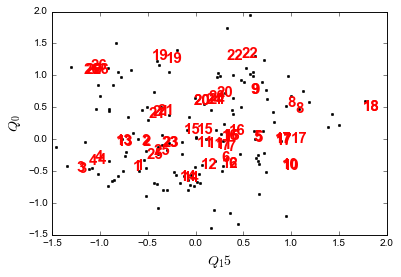

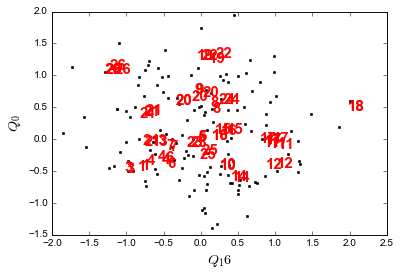

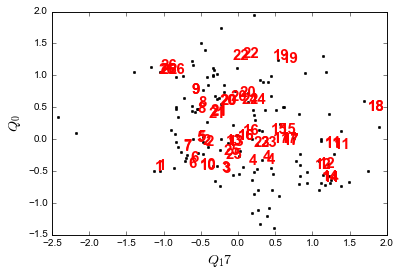

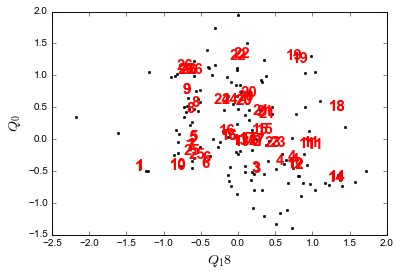

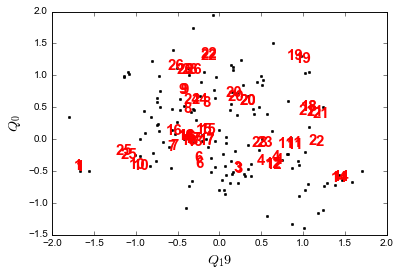

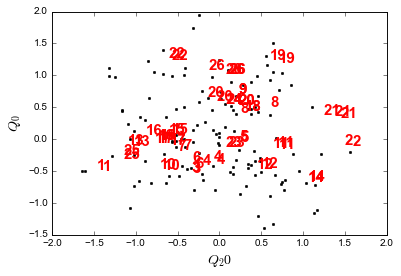

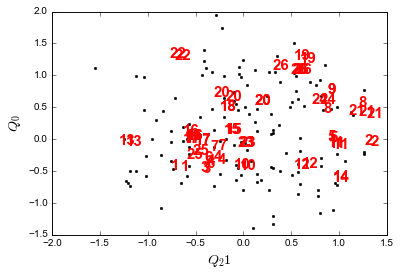

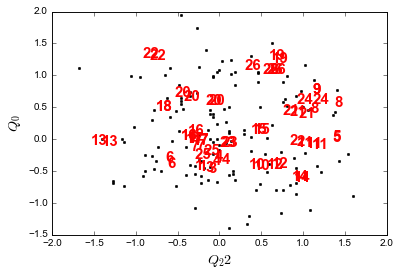

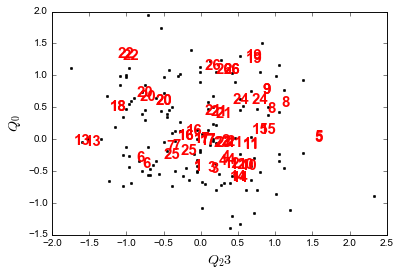

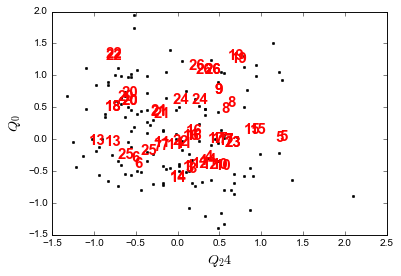

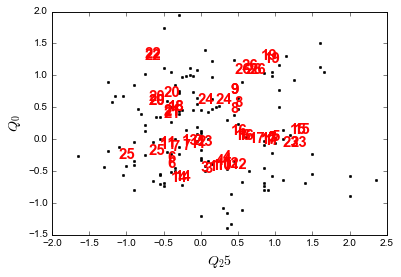

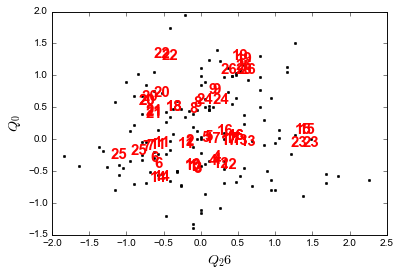

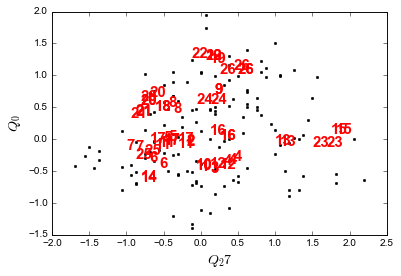

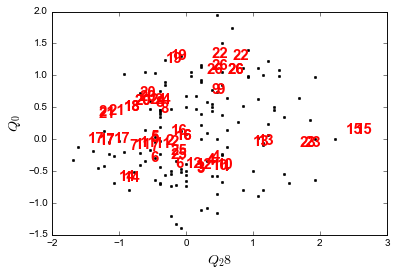

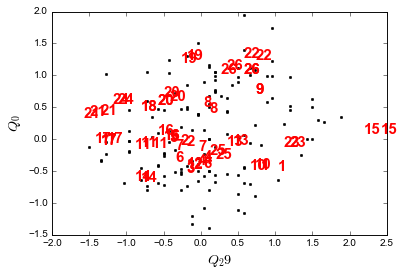

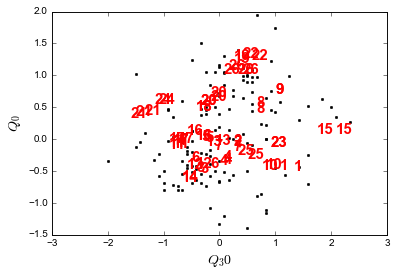

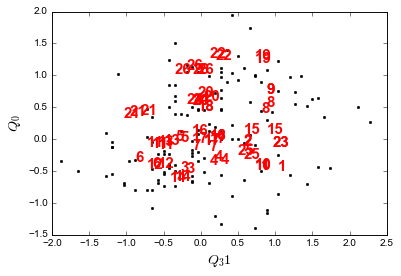

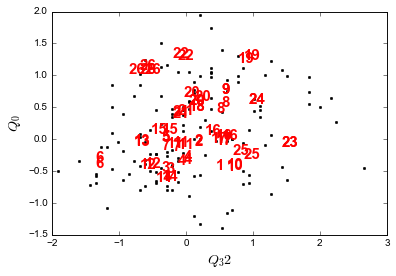

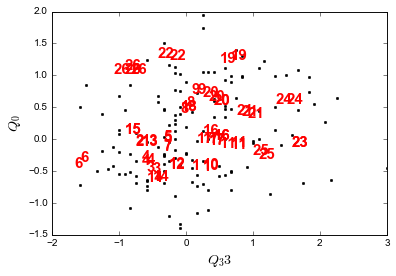

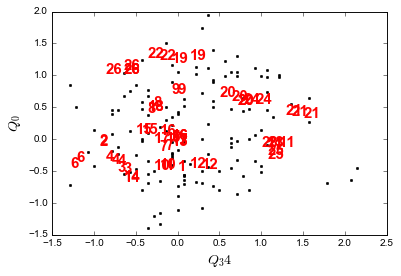

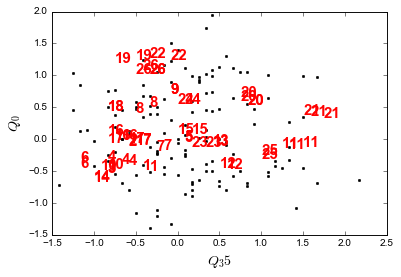

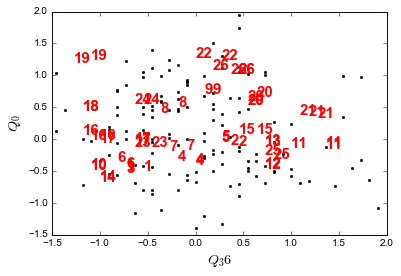

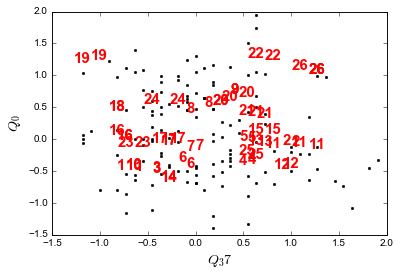

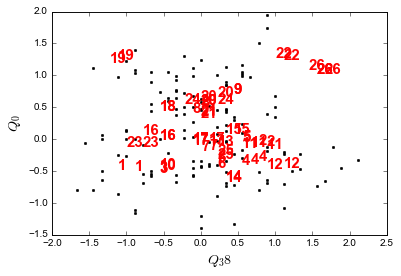

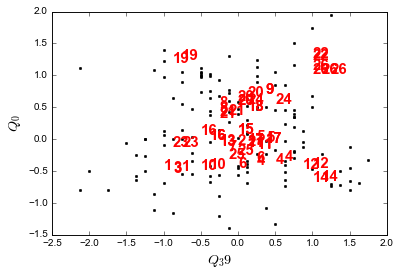

In [43]:
from matplotlib import offsetbox
i_compare = 0

mn = scaled_saxs.min(axis=0)
mx = scaled_saxs.max(axis=0)

# for i0 in range(1):
for i0 in range(40):
    plt.figure()
    
    # plot points to make the correct box size
    plt.plot(mn[i0], mn[i_compare], 'w.')
    plt.plot(mx[i0], mx[i_compare], 'w.')
    
    for j in range(len(scaled_saxs)):
        if slabels[j] != '0':
            plt.text(scaled_saxs[j, i0], scaled_saxs[j, i_compare], slabels[j],
                     fontdict={'weight': 'bold', 'size': 15}, 
                     color='r') # plt.cm.Set1(labels[i]/10.0))
        else:
            plt.plot(scaled_saxs[j, i0], scaled_saxs[j, i_compare], 'k.',
                    markersize=5)
                
    plt.xlabel(r'$Q_{}$'.format(i0))
    plt.ylabel(r'$Q_{}$'.format(i_compare))

### Write DCD output

In [87]:
import sasmol.sasmol as sasmol

dcd_fname = glob.glob('*.dcd')
assert len(dcd_fname) == 1, 'ERROR: unsure which dcd file to use: {}'.format(dcd_fname)
dcd_fname = dcd_fname[0]

pdb_fname = glob.glob('*.pdb')
assert len(pdb_fname) == 1, 'ERROR: unsure which dcd file to use: {}'.format(pdb_fname)
pdb_fname = pdb_fname[0]

In [88]:
mol = sasmol.SasMol(0)
mol.read_pdb(pdb_fname)

reading filename:  centered_mab.pdb
num_atoms =  20667
>>> found  1  model(s) or frame(s)
finished reading frame =  1


In [89]:
if not np.alltrue(n_labels == x_labels):
    print('WARNING: labels do not match\nusing neutron labels')
labels = n_labels

In [90]:
dcd_fname

'to_test2.dcd'

In [92]:
# create a dcd for every cluster with >1 frame
dcd_fnames = []
cluster_out_files = [] # dcds for clusters
unique_out_fname = '{}_uniue.dcd'.format(dcd_fname[:-4]) 
dcd_out_file = mol.open_dcd_write(unique_out_fname) # dcd file for unique structures

dcd_in_file = mol.open_dcd_read(dcd_fname)

for i in xrange(len(unique)):
    dcd_fnames.append('{}_c{:02d}.dcd'.format(dcd_fname[:-4], i))
    cluster_out_files.append(mol.open_dcd_write(dcd_fnames[i]))

visited_cluster = set()
dcd_out_frame = 0
cluster_out_frame = np.zeros(len(unique), dtype=int)

for (i, label) in enumerate(labels):
    mol.read_dcd_step(dcd_in_file, i)
    if label == 0:
        dcd_out_frame += 1
        mol.write_dcd_step(dcd_out_file, 0, dcd_out_frame)
    else:
        cluster_out_frame[label-1] += 1
        # print('adding frame to cluster {}'.format(label-1))
        # print(cluster_out_frame)
        mol.write_dcd_step(cluster_out_files[label-1], 0, cluster_out_frame[label-1])
        if label not in visited_cluster:
            visited.add(label)
            dcd_out_frame += 1
            mol.write_dcd_step(dcd_out_file, 0, dcd_out_frame)
        
for cluster_out_file in cluster_out_files:
    mol.close_dcd_write(cluster_out_file)

mol.close_dcd_write(dcd_out_file)    
mol.close_dcd_read(dcd_in_file[0])


........................................................................................................................................................................................................result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0
result =  0


### PCA Analysis

In [19]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

ImportError: No module named sklearn.decomposition

In [ ]:
pca_orig = PCA()
pca_orig.fit(saxs_data)

In [ ]:
pca_scaled = PCA()
pca_scaled.fit(scaled_saxs)

In [ ]:
print(pca_orig.explained_variance_ratio_)
print(pca_scaled.explained_variance_ratio_)

In [ ]:
plt.figure()
plt.plot(q_values, pca_orig.explained_variance_ratio_, 'o', label='unscaled')
plt.plot(q_values, pca_scaled.explained_variance_ratio_, 's', label='scaled')
plt.legend()

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_range = X.max(axis=0) - X.min(axis=0)
print(X_range)

In [ ]:
X_scaled_range = X_scaled.max(axis=0) - X_scaled.min(axis=0)
print(X_scaled_range)

In [ ]:
X_s2 = StandardScaler().fit_transform(X)

In [ ]:
X_s2_range = X_s2.max(axis=0) - X_s2.min(axis=0)
print(X_s2_range)